<a href="https://colab.research.google.com/github/jayadityakishore/California_bay-using-keras/blob/main/California_housing_Jay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
np.random.seed(0)

#Data

In [ ]:
db = pd.read_csv('/content/housing.csv')
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


households            1.000000
total_bedrooms        0.979728
total_rooms           0.918484
population            0.907222
median_house_value    0.065843
longitude             0.055310
median_income         0.013033
latitude             -0.071035
housing_median_age   -0.302916
Name: households, dtype: float64


<ipython-input-3-5eb5706145a2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = db.corr()


<Axes: >

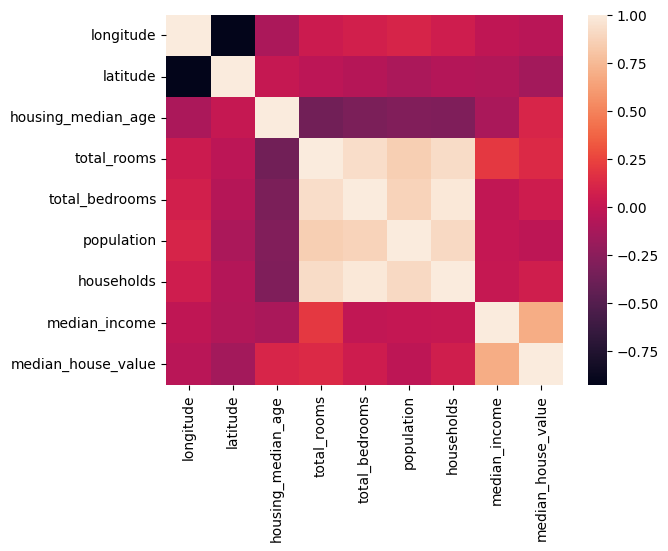

In [ ]:
correlation = db.corr()
x = correlation['households'].sort_values(ascending=False)
print(x)
sns.heatmap(correlation)

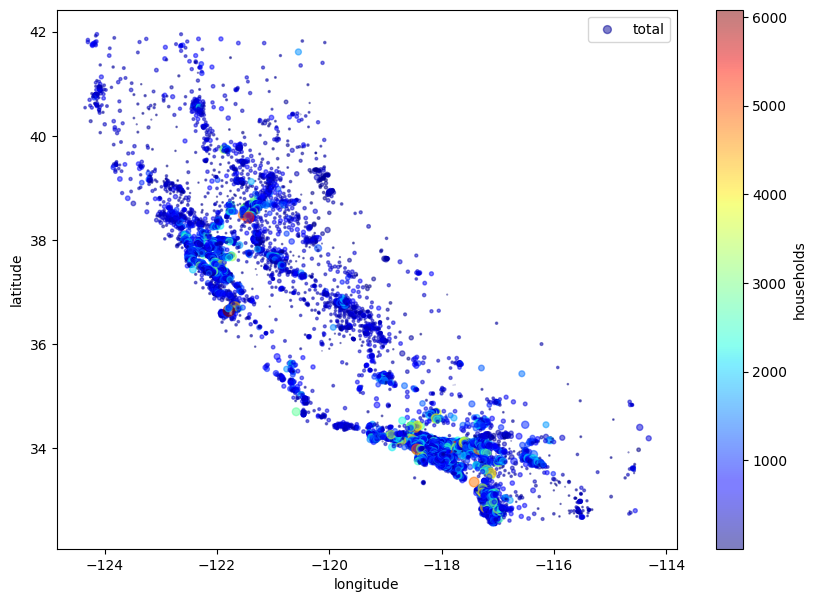

In [ ]:
db.plot(kind='scatter' , x='longitude', y = 'latitude', alpha=0.5,
        s=db["total_bedrooms"]/100, label = 'total', figsize = (10,7),
        c = 'households' ,cmap = plt.get_cmap('jet'), colorbar=True,
)
plt.legend()

#data

#train

<Axes: xlabel='households', ylabel='total_bedrooms'>

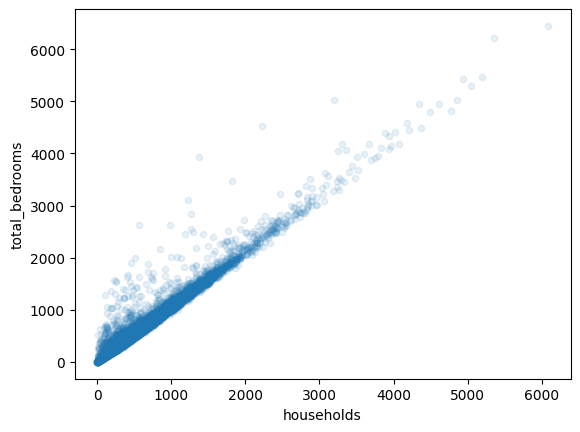

In [ ]:
db.plot(kind = 'scatter', x = 'households', y = 'total_bedrooms', alpha = 0.1)

#Cleaning Data

In [ ]:
median_bedrooms = db['total_bedrooms'].median()
db['total_bedrooms'].fillna(median_bedrooms,inplace = True)

x = db['households']
y = db ['total_bedrooms']

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 30, test_size = 0.25, shuffle = False)


In [ ]:
model =Sequential()
model.add(Dense(units = 128,input_shape = (1,1),activation='relu'))
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 1, activation = 'linear'))
model.compile(loss = 'mae', optimizer = 'adam')


batch_size = 32
epochs = 100
model.fit(x=x_train, y=y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/100
484/484 [==============================] - 2s 2ms/step - loss: 80.8946
Epoch 2/100
484/484 [==============================] - 1s 2ms/step - loss: 65.6412
Epoch 3/100
484/484 [==============================] - 1s 2ms/step - loss: 66.2547
Epoch 4/100
484/484 [==============================] - 1s 2ms/step - loss: 66.0606
Epoch 5/100
484/484 [==============================] - 1s 2ms/step - loss: 65.4123
Epoch 6/100
484/484 [==============================] - 1s 3ms/step - loss: 64.7817
Epoch 7/100
484/484 [==============================] - 2s 3ms/step - loss: 63.6566
Epoch 8/100
484/484 [==============================] - 1s 3ms/step - loss: 63.0281
Epoch 9/100
484/484 [==============================] - 1s 2ms/step - loss: 63.1590
Epoch 10/100
484/484 [==============================] - 1s 2ms/step - loss: 62.9630
Epoch 11/100
484/484 [==============================] - 1s 2ms/step - loss: 62.3799
Epoch 12/100
484/484 [==============================] - 1s 2ms/step - loss: 62.1118
E

In [ ]:
from sklearn.metrics import mean_absolute_error
predictions = model.predict(x_test)
predictions = predictions.reshape(y_test.shape)
print(predictions)

print(y_test)
error = mean_absolute_error(predictions, y_test)
print(error)

162/162 [==============================] - 0s 1ms/step
[416.01038 202.66702 187.58214 ... 462.3425  371.8332  566.8592 ]
15480    381.0
15481    182.0
15482    198.0
15483    208.0
15484    671.0
         ...  
20635    374.0
20636    150.0
20637    485.0
20638    409.0
20639    616.0
Name: total_bedrooms, Length: 5160, dtype: float64
34.30307215831076
